In [2]:
%pip install karateclub==1.2.1

  Created wheel for karateclub: filename=karateclub-1.2.1-py3-none-any.whl size=94671 sha256=e9bd2549c19eb63076f0f3d2b62ff79a05895154c43d153f19615865517dc8a0
  Stored in directory: c:\users\nabr9\appdata\local\pip\cache\wheels\bf\42\bf\50708e8640a92501f5f6bf04b4182ac112db44c02ac817af43
Successfully built karateclub
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.0
    Uninstalling decorator-5.1.0:
      Successfully uninstalled decorator-5.1.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
from karateclub.utils.walker import RandomWalker

In [2]:
import karateclub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import networkx as nx
from typing import Optional, Tuple, Union
from IPython.display import clear_output, display
import time


In [3]:
from karateclub import Estimator
from sklearn.cluster import KMeans

In [4]:
from karateclub import DeepWalk, Node2Vec, Diff2Vec

In [78]:
# from easygraph.functions.graph_embedding.sdne import SDNE

In [5]:
def node_embedding_method_claster(
    G: nx.Graph, model: Estimator, n_clusters: int = 4, node_size: int = 500, font_size=16, seed: int = 42
) -> None:
    model.fit(G.copy())
    embeddings = model.get_embedding()
    labels = KMeans(n_clusters,random_state=seed).fit_predict(embeddings)

    pos = nx.spring_layout(G, seed=seed)
    cmap = plt.get_cmap("tab10")
    node_colors = [cmap(label) for label in labels]

    nx.draw(G, pos=pos, node_color=node_colors, node_size=node_size,  with_labels=True)
    plt.title(
        f"Colored nodes based on clusters identified by K-Means (K={n_clusters})\n on embeddings extracted with "
        f"{type(model).__name__}",
        fontsize=font_size,
    )

In [130]:
# model = SDNE(G, hidden_size=[256, 128]) # The hidden size in SDNE.
# model.train(batch_size=3000, epochs=40, verbose=2)
# embeddings = model.get_embeddings() # Returns the graph embedding results.
# embeddings

In [120]:
from karateclub.dataset import GraphReader

reader = GraphReader("twitch")

graph = reader.get_graph()

In [121]:
len(graph.nodes()), len(graph.edges())

(7126, 35324)

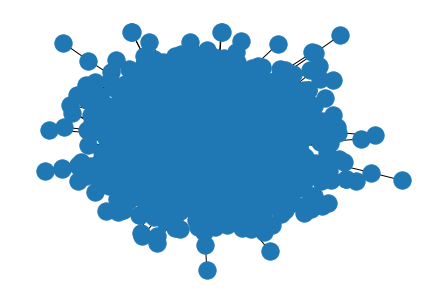

In [122]:

nx.draw(graph)

In [400]:
G = nx.karate_club_graph()
y = []
for i in range(len(G.nodes)):
    if G.nodes[i]["club"] == 'Mr. Hi':
        y.append(1)
    else:
        y.append(0)

In [401]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [402]:
colors = ['blue' if i == 1 else 'red' for i in y]

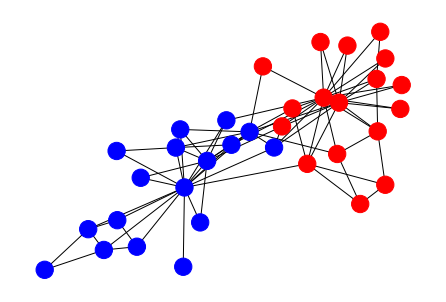

In [403]:
nx.draw(G, node_color = colors)

In [404]:
model = DeepWalk()
model.fit(G)
X = model.get_embedding(); X

array([[ 0.12995414, -0.03999272,  0.07429791, ...,  0.07453801,
         0.02683826,  0.3086414 ],
       [ 0.03415331, -0.12406873,  0.10147108, ...,  0.05083363,
         0.10093827,  0.27473024],
       [ 0.07970097, -0.03226515, -0.02676443, ...,  0.12347613,
         0.0705    ,  0.18223979],
       ...,
       [-0.0142254 , -0.05039331, -0.06235138, ...,  0.17406218,
         0.0911556 , -0.00587836],
       [-0.07153141, -0.18026015, -0.02776341, ...,  0.10644192,
         0.25374678,  0.04357051],
       [-0.11024766, -0.1684487 , -0.03756375, ...,  0.0863002 ,
         0.2516934 , -0.00708587]], dtype=float32)

In [405]:
len(X)

34

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [412]:
clf1 = svm.LinearSVC(max_iter=10000).fit(X_train, y_train)

In [418]:
y_pred = clf1.predict(X)

In [420]:
print(clf1.predict(X_test), metrics.classification_report(y, y_pred))

[0 1 0 0 0 0 1]               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [421]:
colors1 = ['blue' if i == 1 else 'red' for i in y_pred]

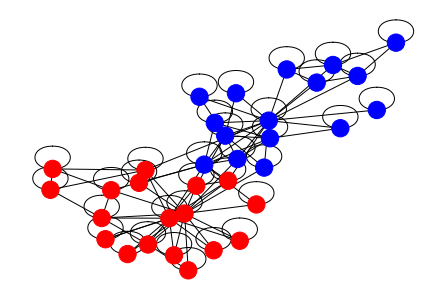

In [422]:
nx.draw(G, node_color = colors1)

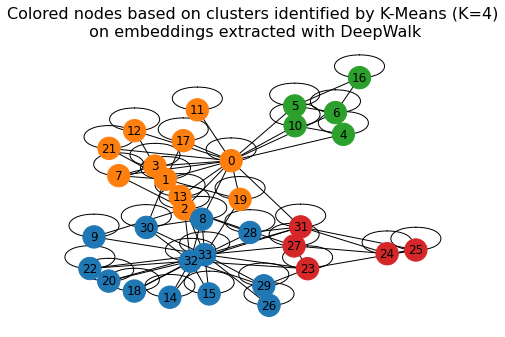

In [38]:
node_embedding_method_claster(G, DeepWalk(dimensions=16))

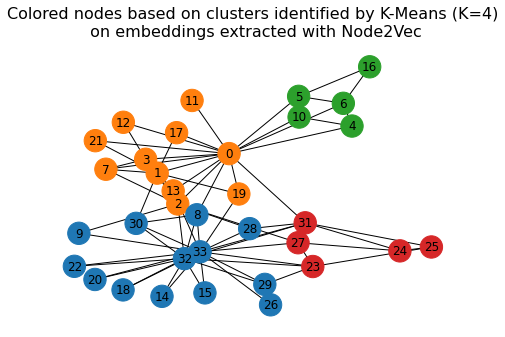

In [9]:

node_embedding_method_claster(G, Node2Vec(dimensions=16))

In [10]:
from karateclub.dataset import GraphReader
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [423]:
reader = GraphReader("twitch")

graph = reader.get_graph()
y = reader.get_target()

In [370]:
# plt.figure(1,(100, 100))
# nx.draw(graph, node_color = colors)

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [426]:
start_time = time.time()
model = DeepWalk()
model.fit(graph)
X = model.get_embedding()
time.time() - start_time

29.810446977615356

In [427]:
X

array([[ 9.3868488e-01, -1.5599473e-01, -9.3538477e-04, ...,
         1.0217876e+00, -2.8958008e-02, -2.4806330e-01],
       [ 3.1835258e-01,  1.9327240e+00,  1.2736522e-01, ...,
        -3.4390241e-01,  5.5287111e-01, -7.5746644e-01],
       [-3.2754236e-01, -7.8386760e-01, -1.8387917e+00, ...,
         3.7148264e-01, -3.0234557e-01, -4.0374836e-01],
       ...,
       [ 2.3695605e-01,  1.3771012e+00,  2.1264608e+00, ...,
         6.4589983e-01,  1.2976354e-01, -9.9921912e-02],
       [-1.8576912e+00, -4.1180173e-01, -4.3125635e-01, ...,
        -5.6976891e-01,  1.4393344e+00, -5.2045739e-01],
       [-7.8393716e-01, -4.2049822e-01, -1.7180310e-01, ...,
         4.4818148e-01,  6.9045432e-02, -3.1487003e-01]], dtype=float32)

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [429]:
downstream_model = LogisticRegression(solver = 'sag', random_state=0, max_iter = 500).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

AUC: 0.5950


In [430]:
y_pred = downstream_model.predict(X_test)
gcn_acc = (y_pred == y_test).mean(); gcn_acc

0.5799438990182328

In [431]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [377]:
# colors = ['red' if i == 0 else 'blue' for i in y]

In [378]:
# plt.figure(1,(100, 100))
# nx.draw(graph, node_color = colors)

In [433]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=700).fit(X_train, y_train)
print(clf.predict_proba(X_test),clf.predict(X_test), metrics.classification_report(y_test, y_pred))

[[4.2672753e-03 9.9573272e-01]
 [0.0000000e+00 1.0000000e+00]
 [9.9914193e-01 8.5808785e-04]
 ...
 [9.8271942e-01 1.7280594e-02]
 [0.0000000e+00 1.0000000e+00]
 [1.1118370e-01 8.8881630e-01]] [1 1 0 ... 0 1 1]               precision    recall  f1-score   support

           0       0.56      0.45      0.50       667
           1       0.59      0.69      0.64       759

    accuracy                           0.58      1426
   macro avg       0.58      0.57      0.57      1426
weighted avg       0.58      0.58      0.57      1426



In [380]:
from sklearn import metrics

In [381]:
import sklearn.svm as svm
start_time = time.time()
svect = svm.LinearSVC(max_iter=10000).fit(X_train, y_train)
y_pred = svect.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Время выполнения", (time.time()-start_time))

              precision    recall  f1-score   support

           0       0.56      0.46      0.51       667
           1       0.59      0.68      0.63       759

    accuracy                           0.58      1426
   macro avg       0.58      0.57      0.57      1426
weighted avg       0.58      0.58      0.57      1426

Время выполнения 8.418824434280396


In [363]:
from sklearn.model_selection import learning_curve

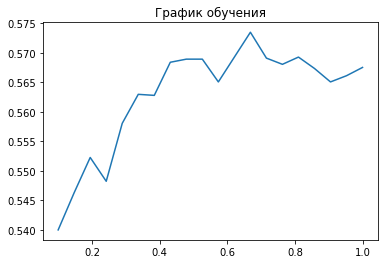

In [364]:
_, train_scores, test_scores = learning_curve(downstream_model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 20), cv=3)
plt.plot(np.linspace(0.1, 1, 20), np.mean(test_scores, axis=1))
plt.title('График обучения')
plt.show()

In [174]:
graph.nodes

NodeView((6194, 255, 980, 2992, 2507, 986, 4003, 0, 82, 15, 343, 4282, 5442, 1162, 3401, 7106, 6211, 6611, 1348, 2239, 2, 5842, 3, 3363, 1277, 3739, 6882, 4947, 5740, 5550, 4, 4087, 5, 2481, 5269, 1, 6, 6072, 3996, 448, 1673, 3079, 436, 2126, 743, 4115, 6286, 7, 2787, 1339, 8, 6926, 9, 3756, 1773, 5945, 5424, 474, 2872, 2439, 6121, 2352, 6168, 3258, 10, 6269, 11, 4291, 6536, 2054, 2677, 12, 5237, 2176, 13, 4198, 3322, 6553, 3418, 1615, 888, 1654, 4945, 5630, 5032, 23, 2339, 6726, 4949, 14, 615, 2779, 1089, 3846, 3815, 4302, 3706, 5470, 4486, 2811, 3826, 1536, 1044, 1960, 4639, 5453, 4024, 231, 2922, 2381, 954, 6448, 1376, 660, 2292, 3532, 1883, 5468, 6716, 1132, 4710, 7051, 3180, 3235, 6343, 5212, 887, 4406, 3241, 4319, 259, 3807, 1390, 1115, 16, 2444, 5892, 6315, 6079, 1752, 104, 581, 7069, 6136, 18, 4140, 19, 485, 365, 3731, 4967, 6682, 2819, 5146, 5358, 3325, 20, 559, 4482, 2156, 7054, 2580, 6299, 3704, 21, 745, 1414, 710, 4960, 4700, 6554, 1158, 22, 4543, 700, 1016, 5052, 211, 5556

In [163]:
G2 = nx.read_edgelist('Testgraph_edgelist.edgelist', delimiter = ',', nodetype = int)

In [164]:
G2.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52))

In [165]:
G2.edges

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 52), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 28), (2, 29), (2, 30), (2, 31), (2, 32), (2, 34), (2, 35), (2, 36), (2, 37), (2, 38), (2, 39), (2, 41), (2, 42), (2, 43), (2, 44), (2, 45), (2, 46), (2, 47), (2, 48), (2, 49), (2, 50), (2, 52), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3,

In [169]:
graph_num = nx.convert_node_labels_to_integers(G2, first_label=0, ordering='default'); graph_num

In [173]:
graph_num.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49))

In [175]:
model = Node2Vec(dimensions=16)
model.fit(graph_num)
X = model.get_embedding()

In [227]:
len(X[0])

16

In [171]:
X

array([[ 2.75815219e-01, -5.88115081e-02,  4.61588949e-01,
         1.59776598e-01,  3.81478250e-01, -5.17888188e-01,
        -2.51049757e-01, -2.66183823e-01,  4.27351177e-01,
        -3.48486245e-01,  4.23312515e-01,  4.23028260e-01,
         4.97702360e-02,  2.76612062e-02,  1.19857483e-01,
         4.16209549e-01],
       [ 2.01572269e-01, -1.15138508e-01,  5.57949781e-01,
         1.27997398e-01,  4.69285607e-01, -5.46131849e-01,
        -2.71490365e-01, -2.77834862e-01,  4.00730968e-01,
        -3.24183822e-01,  5.15358448e-01,  4.36991125e-01,
        -4.97101620e-02,  3.78127024e-02,  1.55786574e-01,
         5.17334640e-01],
       [ 2.64830649e-01, -1.33237541e-01,  4.47028935e-01,
         2.19588727e-01,  4.14190561e-01, -5.56112766e-01,
        -2.62684494e-01, -2.51196593e-01,  4.64361459e-01,
        -3.78712624e-01,  4.83544856e-01,  5.07753909e-01,
        -1.14921490e-02, -4.46837097e-02,  1.48861855e-01,
         3.68702233e-01],
       [ 1.99181631e-01, -9.57963467e

In [18]:
start_time = time.time()
model2 = DeepWalk(dimensions=16)
model2.fit(graph)
X = model2.get_embedding()
time.time() - start_time

28.4082453250885

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
%time
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

Wall time: 0 ns
AUC: 0.5941


In [21]:
y_pred = downstream_model.predict(X_test)
gcn_acc = (y_pred == y_test).mean(); gcn_acc

0.5680224403927069

In [25]:
y_hat

array([0.4047162 , 0.54594377, 0.6303634 , ..., 0.72505909, 0.6701824 ,
       0.4973916 ])

In [24]:
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [22]:
start_time = time.time()
model3 = Node2Vec(dimensions=16)
model3.fit(graph)
X = model3.get_embedding()
time.time() - start_time

KeyboardInterrupt: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

In [ ]:
y_pred = downstream_model.predict(X_test)
gcn_acc = (y_pred == y_test).mean(); gcn_acc

In [487]:
reader1 = GraphReader("facebook")

graph = reader1.get_graph()
y = reader1.get_target()

In [488]:
model = DeepWalk()
model.fit(graph)
X = model.get_embedding()

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [491]:
downstream_model = LogisticRegression(solver = 'sag', random_state=0, max_iter = 500).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]

In [492]:
y_pred = downstream_model.predict(X_test)
gcn_acc = (y_pred == y_test).mean(); gcn_acc

0.69826435246996

In [495]:
y_pred

array([1, 3, 3, ..., 0, 3, 3], dtype=int64)

In [496]:
model2 = Node2Vec()
model.fit(graph)
X = model.get_embedding()

In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [498]:
downstream_model = LogisticRegression(solver = 'sag', random_state=0, max_iter = 500).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]

In [499]:
y_pred = downstream_model.predict(X_test)
gcn_acc = (y_pred == y_test).mean(); gcn_acc

0.6940364931019136

In [500]:
y_pred

array([2, 3, 3, ..., 0, 3, 3], dtype=int64)

In [501]:
model2 = Diff2Vec()
model.fit(graph)
X = model.get_embedding()

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [503]:
downstream_model = LogisticRegression(solver = 'sag', random_state=0, max_iter = 500).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]

C:\Users\nabr9\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [504]:
y_pred = downstream_model.predict(X_test)
gcn_acc = (y_pred == y_test).mean(); gcn_acc

0.7000445037828216

In [505]:
y_pred

array([2, 3, 3, ..., 0, 3, 3], dtype=int64)